In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.linalg as la
import scipy.sparse as sparse
import scipy.signal as signal
from scipy.sparse.linalg import LinearOperator
from scipy.fft import fft, ifft, fft2, ifft2, fftfreq, fftshift, ifftshift
from scipy.optimize import minimize
# from sklearn import datasets
from scipy.stats import multivariate_normal, norm

In [ ]:
fs = 1000
T = 1
t = np.linspace(0, T, fs, False)  # 1 second
x = 0.5*(np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t))+1
n = len(t)
d = 1/fs

rng = np.random.default_rng()
#noise = rng.standard_normal(len(t)) * 0.1


#noise = np.zeros(n)
#start_index = rng.integers(0, n - 50)
#noise[start_index:start_index + 50] = rng.standard_normal(50) * 0.1

sparse_array = np.zeros(n)
sparse_array[start_index:start_index+50] = 1

#xn = x + noise

bandwidth = 0.3
freq   = fftfreq(n)
S      = np.eye(n)[:,np.abs(freq)>=bandwidth]
k      = S.shape[1]
z = rng.standard_normal(k)*12
filtered_noise   = ifft(S@z).real

# make the noise sparse, however, now the frequency of the noise is less great
Sparsify = np.diag(sparse_array)
sparse_noise = Sparsify@filtered_noise

# # Design a high-pass filter, order 4 cut-off 100
# sos = signal.butter(4, 100, btype='highpass', fs=1000, output='sos')

# # Apply the high-pass filter to the noise
# filtered_noise = signal.sosfilt(sos, noise)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

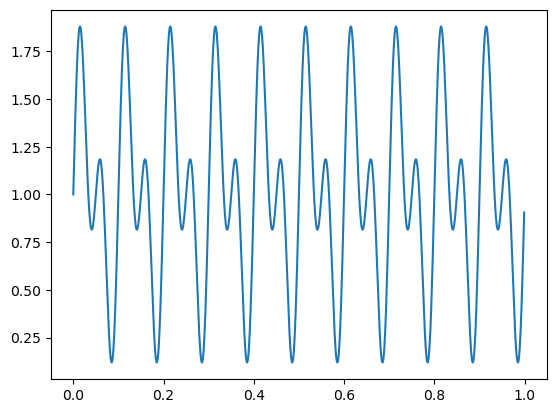

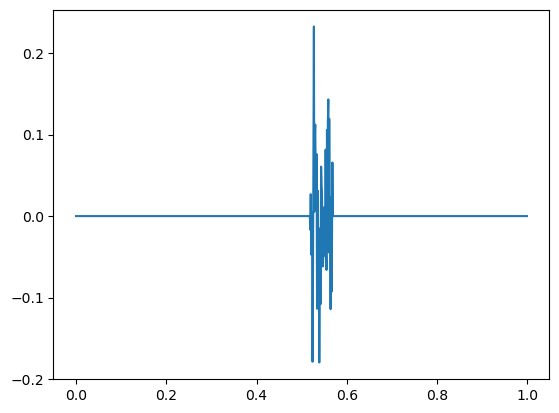

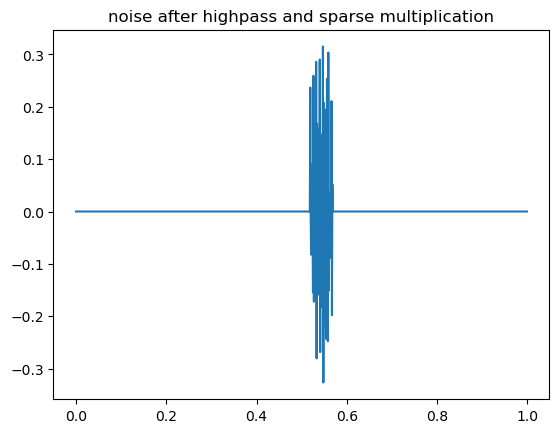

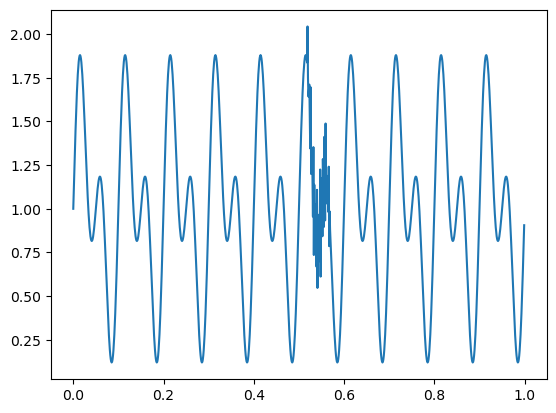

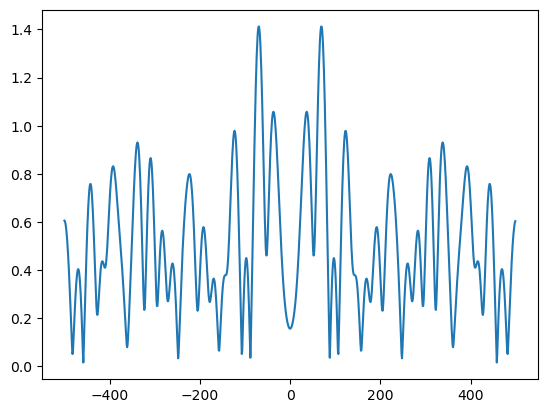

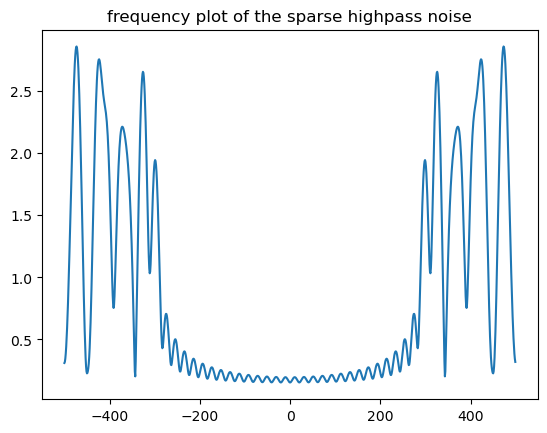

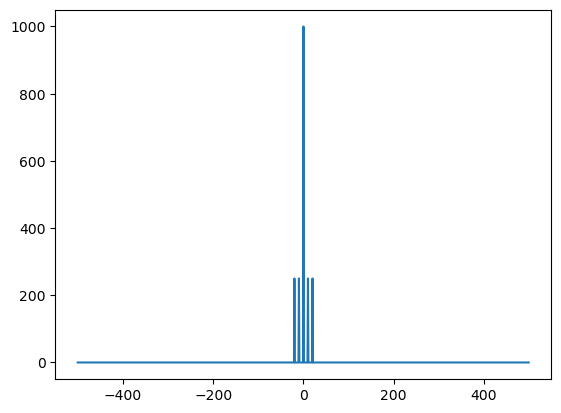

In [79]:
plt.figure()
plt.plot(t,x)

plt.figure()
plt.plot(t,noise)

plt.figure()
plt.title("noise after highpass and sparse multiplication")
plt.plot(t,sparse_noise)

plt.figure()
plt.plot(t,x+sparse_noise)

noise_fft = fft(noise)
amplitudes = abs(noise_fft)
k = fftfreq(len(t),d=d)

sorted_indices = np.argsort(k)
k = k[sorted_indices]
amplitudes = amplitudes[sorted_indices]

plt.figure()
plt.plot(k, amplitudes)
plt.show()

noise_fft_filtered = fft(sparse_noise)
amplitudes = abs(noise_fft_filtered)
k = fftfreq(len(t),d=d)

sorted_indices = np.argsort(k)
k = k[sorted_indices]
amplitudes = amplitudes[sorted_indices]

plt.figure()
plt.title("frequency plot of the sparse highpass noise")
plt.plot(k, amplitudes)
plt.show()

x_fft = fft(x)
amplitudes = abs(x_fft)
k = fftfreq(len(t),d=d)

sorted_indices = np.argsort(k)
k = k[sorted_indices]
amplitudes = amplitudes[sorted_indices]

plt.figure()
plt.plot(k, amplitudes)
plt.show()

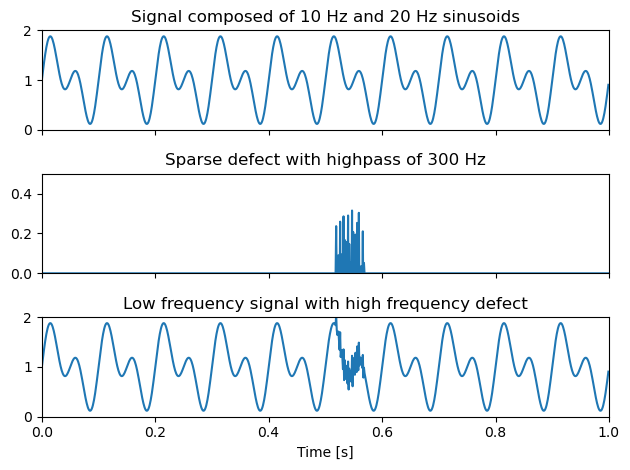

In [77]:
# less ugly plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(t, x)
ax1.set_title('Signal composed of 10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, 0, 2])

ax2.plot(t, sparse_noise)
ax2.set_title('Sparse defect with highpass of 300 Hz')
ax2.axis([0, 1, 0, 0.5])

ax3.plot(t, x + sparse_noise)
ax3.set_title('Low frequency signal with high frequency defect')
ax3.axis([0, 1, 0, 2])
ax3.set_xlabel('Time [s]')

plt.tight_layout()
plt.show()